<a href="https://colab.research.google.com/github/GroupA15/Machine-Learning-from-Disaster/blob/main/Groupa15_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

# Data Upload

In [55]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [56]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

##Train Data

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##Test Data

In [ ]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#Data Exploration


In [ ]:
print('Shape of train_data:',train_data.shape)
print(train_data.columns.values)

Shape of train_data: (891, 12)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
print('Shape of train_data:',test_data.shape)
print(test_data.columns.values)

Shape of train_data: (418, 11)
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


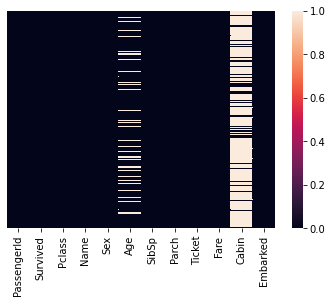

In [ ]:
# heatmap showing null values
sns.heatmap(train_data.isnull(),yticklabels=False)

In [ ]:
#Defining a function to calculate the percentage of missing values in each column. The input will be dataframe and the output will show as two columns

def missing_percent(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percentage=round(total*100/len(df),2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
    

In [ ]:
missing_percent(train_data)
print("Percentage is percentage of all data that is null")

Percentage is percentage of all data that is null


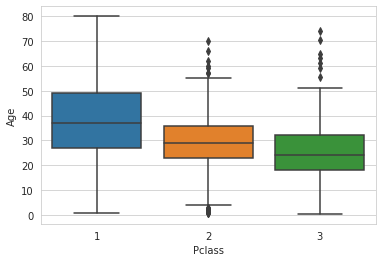

In [ ]:
# mean ages in 3 different passenger groups

sns.set_style("whitegrid")
sns.boxplot(x='Pclass',y='Age',data=train_data,)

In [ ]:
#Defining function to set null ages as mean age in three categories of passengers based on type of ticket was bought

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else: 
            return 24
    else:
        return Age

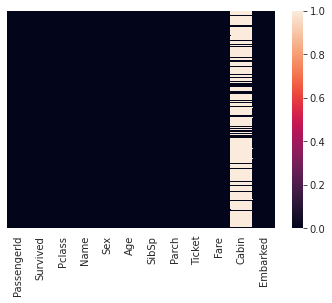

In [ ]:
#updated heatmap showing less missing/null data
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train_data.isnull(),yticklabels=False)

In [ ]:
# Missing values in test data
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
missing_percent(test_data)

,Total,Percentage
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


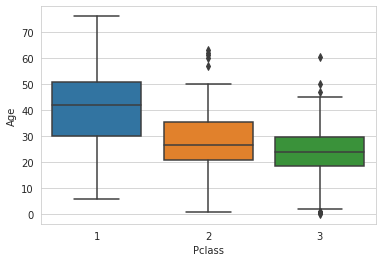

In [ ]:
# looking again at the updated data for the mean age based on different classes of tickets

sns.set_style("whitegrid")
sns.boxplot(x='Pclass',y='Age',data=test_data)

In [ ]:
# updating function previously defined to give a more accurate mean age to null ages

def impute_age_test(cols1):
    Age=cols1[0]
    Pclass=cols1[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 27
        else: 
            return 25
    else:
        return Age

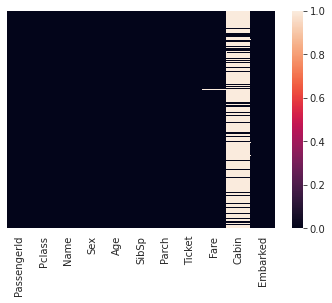

In [ ]:
test_data['Age']=test_data[['Age','Pclass']].apply(impute_age_test,axis=1)
sns.heatmap(test_data.isnull(),yticklabels=False)

In [ ]:
# removing cabin data from the data set as less than 30% of data is available and is not a helpful data type

train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

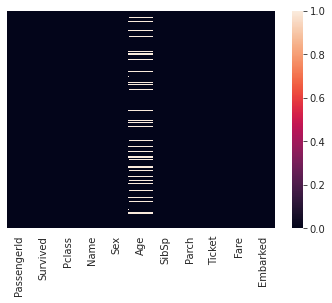

In [ ]:
# showing the new dataset with no null values
sns.heatmap(train_data.isnull(),yticklabels=False)

In [ ]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

In [ ]:
print(train_data.isnull().sum())
print('shape of train data: ',train_data.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64
shape of train data:  (891, 11)


In [ ]:
test_data['Fare'].fillna(test_data['Fare'].mode()[0],inplace=True)


In [ ]:
print(test_data.isnull().sum())
print('shape of test data: ',test_data.shape)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
shape of test data:  (418, 10)


0 shows the amount of passengers died, 1 shows the amount of passengers that survived


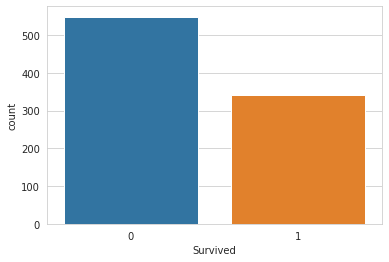

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data)



print("0 shows the amount of passengers died, 1 shows the amount of passengers that survived")


Shows which passengers survived based on whether they were female/male


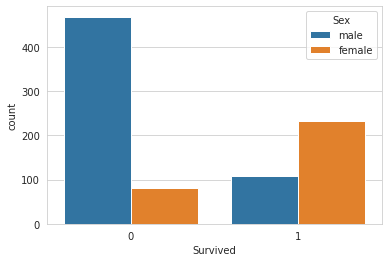

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data)
print("Shows which passengers survived based on whether they were female/male")

Shows which passengers survived in different passenger/ticket classes


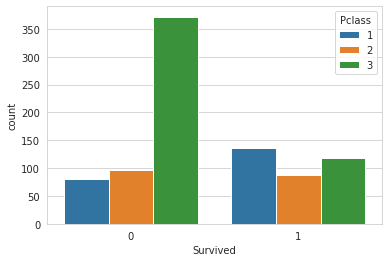

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data)
print("Shows which passengers survived in different passenger/ticket classes")

In [ ]:
train_data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


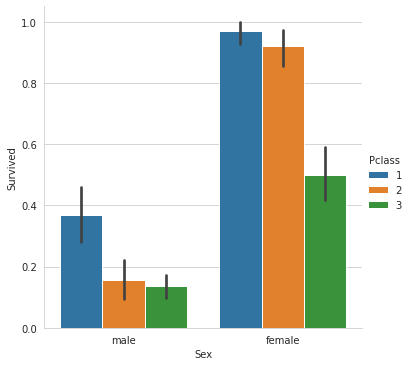

In [ ]:
sns.catplot(x='Sex',y='Survived',hue='Pclass', kind='bar',data=train_data)

In [ ]:
train_data[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_data[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


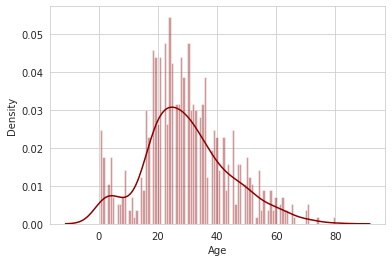

In [ ]:
sns.distplot(train_data['Age'],kde=True,bins=100,color='darkred')

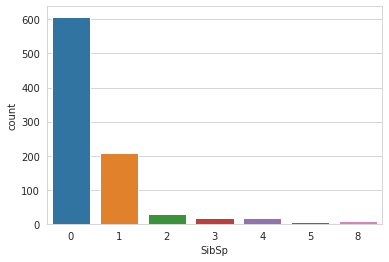

In [ ]:
sns.countplot(x='SibSp',data=train_data)

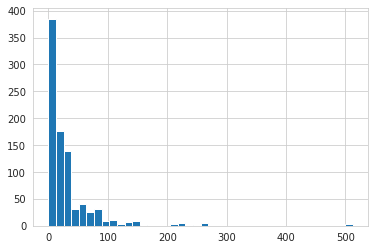

In [ ]:
train_data['Fare'].hist(bins=40)

In [ ]:
print(train_data.describe())

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


In [ ]:
print(test_data.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean   1100.500000    2.265550   29.577751    0.447368    0.392344   35.560497
std     120.810458    0.841838   12.924561    0.896760    0.981429   55.857145
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   23.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   25.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   36.375000    1.000000    0.000000   31.471875
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
pd.get_dummies(train_data['Embarked'],drop_first=True).head()
pd.get_dummies(test_data['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [ ]:
sex_1=pd.get_dummies(train_data['Sex'],drop_first=True)
embark_1=pd.get_dummies(train_data['Embarked'],drop_first=True)
sex_2=pd.get_dummies(test_data['Sex'],drop_first=True)
embark_2=pd.get_dummies(test_data['Embarked'],drop_first=True)

In [ ]:
train_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
test_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [ ]:
train_data=pd.concat([train_data,sex_1,embark_1],axis=1)
test_data=pd.concat([test_data,sex_2,embark_2],axis=1)

In [ ]:
train_data.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [ ]:
# Correlation - the data set with the highest number other than survived, shows the bias
pd.DataFrame(abs(train_data.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
male,0.543351
Pclass,0.338481
Fare,0.257307
S,0.149683
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007
Q,0.003650


In [ ]:
print(train_data.shape)
print(test_data.shape)

(891, 10)
(418, 9)


In [ ]:
X_train=train_data.drop('Survived',axis=1)  
# Removing the dependent feature from the train data
y_train=train_data['Survived']
X_test=test_data  

In [ ]:
print('Shape of X_train',X_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of X_test',X_test.shape)

Shape of X_train (891, 9)
Shape of y_train (891,)
Shape of X_test (418, 9)


In [54]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_lr=logreg.predict(X_test)
accuracy_logistic=logreg.score(X_train, y_train)
print('Accuracy score by using logistic regression is:',round(accuracy_logistic,2))

ValueError: ignored